In [1]:
import networkx as nx
import numpy as np
import pandas as pd

# for the explode statement; convert string to list
from ast import literal_eval

from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 

In [2]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

In [55]:
data = r'data/arxiv_artificial_life.csv'

df = pd.read_csv(data)

df['date_published'] = pd.to_datetime(df['date_published'])
df['authors'] = df['authors'].apply(literal_eval)

# remove everything that doesn't mention artificial life explicitely in the summary; too aggressive, but useful for now
mask = df['summary'].str.contains('artificial life', case=False)
df = df[mask]

df.head()

,date_published,title,authors,summary,url,category
117,2023-10-18 14:50:39+00:00,Emergence and criticality in spatiotemporal sy...,[Alessandro Scirè],This work concerns the long-term dynamics of a...,http://arxiv.org/pdf/2310.12018v1,nlin.AO
146,2023-10-13 11:58:18+00:00,Role of Morphogenetic Competency on Evolution,[Lakshwin Shreesha],The relationship between intelligence and evol...,http://arxiv.org/pdf/2310.09318v1,cs.NE
830,2023-06-22 19:32:53+00:00,Amorphous Fortress: Observing Emergent Behavio...,"[M Charity, Dipika Rajesh, Sam Earle, Julian T...",We introduce a system called Amorphous Fortres...,http://arxiv.org/pdf/2306.13169v1,cs.AI
1079,2023-05-16 12:01:08+00:00,Capturing Emerging Complexity in Lenia,"[Sanyam Jain, Aarati Shrestha, Stefano Nichele]","This research project investigates Lenia, an a...",http://arxiv.org/pdf/2305.09378v5,cs.NE
1220,2023-04-24 02:36:25+00:00,Coevolution of Camouflage,[Craig Reynolds],Camouflage in nature seems to arise from compe...,http://arxiv.org/pdf/2304.11793v2,cs.GR


In [56]:
df.shape

(132, 6)

# Dates

In [57]:
df['date_ym'] = df['date_published'].dt.strftime('%Y-%m')

df.head()

,date_published,title,authors,summary,url,category,date_ym
117,2023-10-18 14:50:39+00:00,Emergence and criticality in spatiotemporal sy...,[Alessandro Scirè],This work concerns the long-term dynamics of a...,http://arxiv.org/pdf/2310.12018v1,nlin.AO,2023-10
146,2023-10-13 11:58:18+00:00,Role of Morphogenetic Competency on Evolution,[Lakshwin Shreesha],The relationship between intelligence and evol...,http://arxiv.org/pdf/2310.09318v1,cs.NE,2023-10
830,2023-06-22 19:32:53+00:00,Amorphous Fortress: Observing Emergent Behavio...,"[M Charity, Dipika Rajesh, Sam Earle, Julian T...",We introduce a system called Amorphous Fortres...,http://arxiv.org/pdf/2306.13169v1,cs.AI,2023-06
1079,2023-05-16 12:01:08+00:00,Capturing Emerging Complexity in Lenia,"[Sanyam Jain, Aarati Shrestha, Stefano Nichele]","This research project investigates Lenia, an a...",http://arxiv.org/pdf/2305.09378v5,cs.NE,2023-05
1220,2023-04-24 02:36:25+00:00,Coevolution of Camouflage,[Craig Reynolds],Camouflage in nature seems to arise from compe...,http://arxiv.org/pdf/2304.11793v2,cs.GR,2023-04


In [58]:
agg_df = df[['date_ym', 'title']].groupby('date_ym').count()

agg_df.columns = ['paper_count']

agg_df.head()

,paper_count
date_ym,
1993-06,1
1994-05,1
1994-12,1
1996-05,1
1997-02,1


In [59]:
agg_df.tail()

,paper_count
date_ym,
2023-02,4
2023-04,2
2023-05,1
2023-06,1
2023-10,2


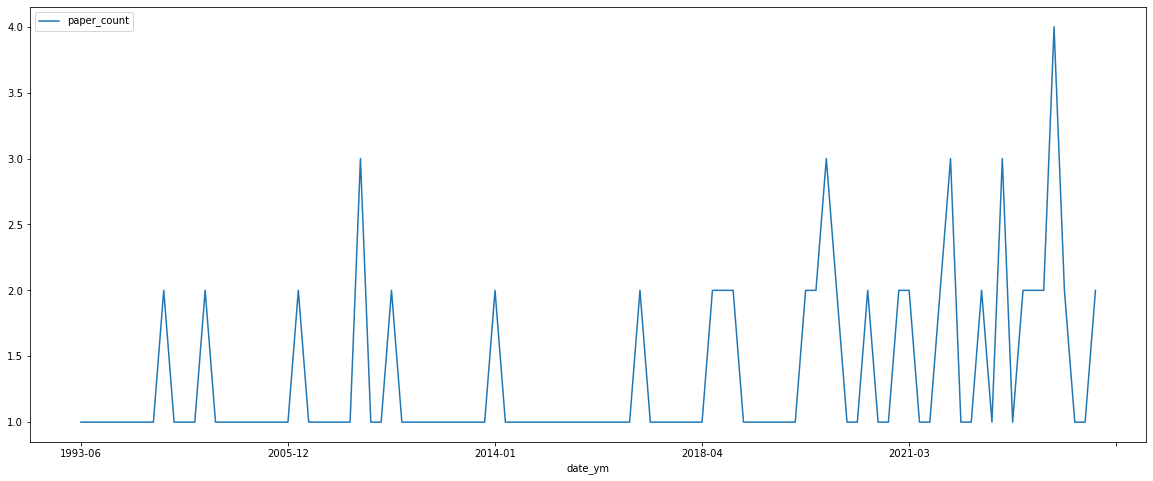

In [12]:
_= agg_df.plot(figsize=(20,8))

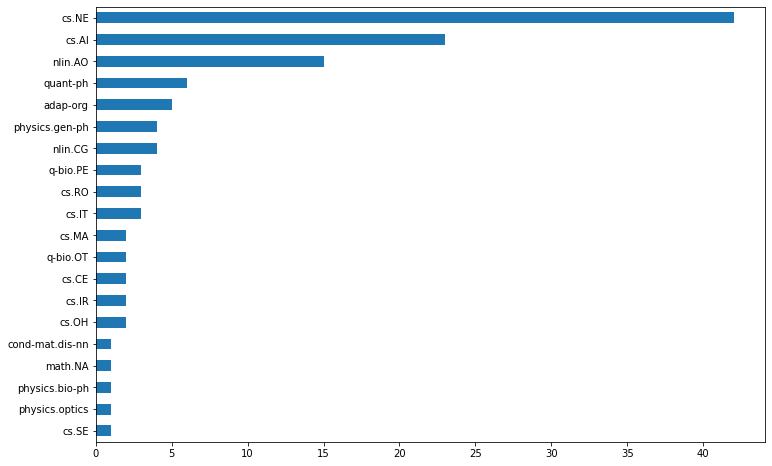

In [16]:
df['category'].value_counts()[0:20].plot.barh(figsize=(12,8)).invert_yaxis()

In [52]:
def show_category_titles(df):
    
    df = df.copy()
    
    categories = list(df['category'].value_counts().index)

    for category in categories:

        print('Category: {}'.format(category))
        print()

        titles = sorted(df[df['category']==category]['title'])
        
        for title in titles:
            print(title)

        print()
        print('-------------------')
        print()

In [53]:
# you can read about the categories here: https://arxiv.org/category_taxonomy
# cs.NE Computer Science: (Neural and Evolutionary Computing)
# cs.AI Computer Science: (Artificial Intelligence)
# nlin.AO Nonlinear Sciences: (Adaptation and Self-Organizing Systems)

# Artificial Life is approached from different sciences
# But nlin.AO could be cool to zoom in on and explore

show_category_titles(df)

Category: cs.NE

A Trillion Genetic Programming Instructions per Second
Achieving Connectivity Between Wide Areas Through Self-Organising Robot Swarm Using Embodied Evolution
An Artificial Life Simulation Library Based on Genetic Algorithm, 3-Character Genetic Code and Biological Hierarchy
An Artificial Neural Network Functionalized by Evolution
An Overview of Open-Ended Evolution: Editorial Introduction to the Open-Ended Evolution II Special Issue
An artifcial life approach to studying niche differentiation in soundscape ecology
Artificial Life in Game Mods for Intuitive Evolution Education
Artificial Life using a Book and Bookmarker
Artificial life: sustainable self-replicating systems
Aspects of Evolutionary Design by Computers
Biologically Inspired Design Principles for Scalable, Robust, Adaptive, Decentralized Search and Automated Response (RADAR)
Capturing Emerging Complexity in Lenia
Challenges and Opportunities of Evolutionary Robotics
Co-generation of game levels and game-play

Ab Initio Modeling of Ecosystems with Artificial Life

-------------------

Category: physics.optics

The Enlightened Game of Life

-------------------

Category: cs.SE

Arduino Tool: For Interactive Artwork Installations

-------------------

Category: cs.CV

Brain Intelligence: Go Beyond Artificial Intelligence

-------------------

Category: cs.DC

Artificial life, complex systems and cloud computing: a short review

-------------------

Category: physics.app-ph

Robotics: Science preceding science fiction

-------------------

Category: cs.GR

Coevolution of Camouflage

-------------------

Category: cs.CR

Adversarial Genetic Programming for Cyber Security: A Rising Application Domain Where GP Matters

-------------------

Category: q-bio.NC

On Artificial Life and Emergent Computation in Physical Substrates

-------------------

Category: q-bio.BM

Building blocks of protein structures -- Physics meets Biology

-------------------

Category: math.CT

Rosen's no-go theorem for reg

In [120]:
search_title = 'Organized Complexity: is Big History a Big Computation?'

url = df[df['title']==search_title]['url'].values[0]
print(url)

http://arxiv.org/pdf/1609.07111v2


In [ ]:
# Today's Goal will be to find the signal that I want; Artificial Life, not Artificial Intelligence